In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('insurance.csv')

In [20]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)
label.fit(data.smoker)
data.smoker = label.transform(data.smoker)
label.fit(data.region)
data.region = label.transform(data.region)

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
x = data.drop(['charges', 'region'], axis = 1)
y = data.charges

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)


In [12]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)

In [13]:
print(train_rmse)



38188846.24553773


In [14]:
print(test_rmse)

32239880.653186936


In [15]:
y_pred = lr.predict(x)

In [16]:
import seaborn as sns

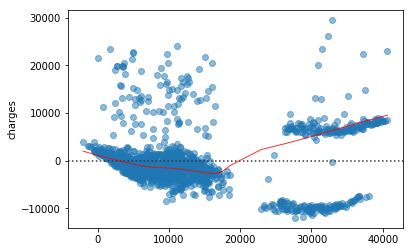

In [17]:
plt = sns.residplot(y_pred, y, data=data, lowess=True, scatter_kws={'alpha': 0.5}, line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

# Polynomial Basis Fucntion

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
def poly_reg(m):
    quad = PolynomialFeatures(degree = m)
    x_quad = quad.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

    plr1 = LinearRegression().fit(x_train, y_train)
    y_pred_train = plr1.predict(x_train)
    y_pred_test = plr1.predict(x_test)
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse = mean_squared_error(y_test, y_pred_test)
    
    train_acc = plr1.score(x_train, y_train)
    test_acc = plr1.score(x_test, y_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_acc) + ", test rmse = " + str(test_acc) \
         + "train accuracy = " + str(train_acc) + " test accuracy = " + str(test_acc) )
    
    return train_rmse, test_rmse, train_acc, test_acc
    




In [45]:
x_coord = []
y_coord_train_rmse = []
y_coord_test_rmse = []
y_coord_train_acc = []
y_coord_test_acc = []

for i in range(1, 6):
    x_coord.append(i)
    a, b, c, d = poly_reg(i)
    y_coord_train_rmse.append(a)
    y_coord_test_rmse.append(b)
    y_coord_train_acc.append(c)
    y_coord_test_acc.append(d)

For m = 1 :  training rmse = 0.732745261917263, test rmse = 0.7952171980481991train accuracy = 0.732745261917263 test accuracy = 0.7952171980481991
For m = 2 :  training rmse = 0.827971069017031, test rmse = 0.8849197344147235train accuracy = 0.827971069017031 test accuracy = 0.8849197344147235
For m = 3 :  training rmse = 0.8355068796804324, test rmse = 0.881016890674589train accuracy = 0.8355068796804324 test accuracy = 0.881016890674589
For m = 4 :  training rmse = 0.844290864337028, test rmse = 0.8795123459678051train accuracy = 0.844290864337028 test accuracy = 0.8795123459678051
For m = 5 :  training rmse = 0.8595291324181669, test rmse = 0.857975955067129train accuracy = 0.8595291324181669 test accuracy = 0.857975955067129


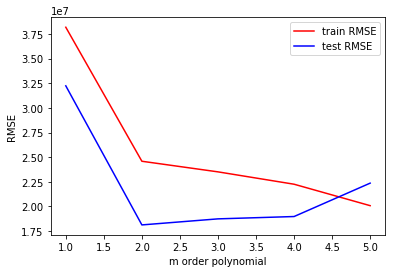

In [46]:
plt.plot(x_coord, y_coord_train_rmse, color='r', label = 'train RMSE')
plt.plot(x_coord, y_coord_test_rmse, color='b', label = 'test RMSE')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('RMSE')
plt.show()

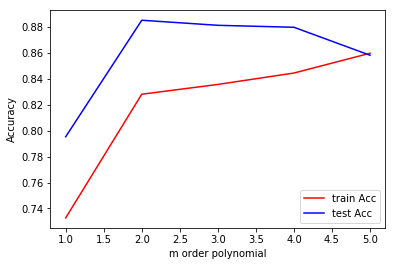

In [47]:
plt.plot(x_coord, y_coord_train_acc, color='r', label = 'train Acc')
plt.plot(x_coord, y_coord_test_acc, color='b', label = 'test Acc')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('Accuracy')
plt.show()

In [31]:
x.shape

(1338, 5)

# Gaussian Basis Functions

In [153]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
       
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        #print("inside")
        arg = (x - y) / width
        #print(arg)
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        #print(X)
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        print(self.centers_.shape)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        #print(self.width_.shape)
        return self
        
    def transform(self, X):
        
        #print(X.shape)
        #print(self.centers_.shape)
        #print(X.iloc[:, :, :, np.newaxis].shape, X.iloc[:, :, :, np.newaxis].head())
        return self._gauss_basis(np.dstack([X]*self.N), self.centers_.reshape((1, 5, self.N)),
                                 self.width_.reshape((1, 5, 1)), axis=2)

    


In [154]:
def gauss_function(m):
    #gauss = GaussianFeatures(m)
    #gauss.fit(x[:, np.newaxis], y)
   # x_gauss = gauss.transform(x_gauss)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    #gauss_model = LinearRegression().fit(x_train, y_train)
    
    gauss_model = make_pipeline(GaussianFeatures(m),
                            LinearRegression())
    gauss_model.fit(x_train, y_train)
    #print(x_train,y_train)
    y_pred_test = gauss_model.predict(x_test)
    y_pred_train = gauss_model.predict(x_train)
    
   
    #y_pred_train = gauss_model.predict(x_train)
    #y_pred_test = gauss_model.predict(x_test)
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse = mean_squared_error(y_test, y_pred_test)
    
    train_acc = gauss_model.score(x_train, y_train)
    test_acc = gauss_model.score(x_test, y_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_acc) + ", test rmse = " + str(test_acc) \
         + "train accuracy = " + str(train_acc) + " test accuracy = " + str(test_acc) )
    
    return train_rmse, test_rmse, train_acc, test_acc
    
 
   
    

In [160]:
## Need to debug this
x_coord = []
y_coord_train_rmse = []
y_coord_test_rmse = []
y_coord_train_acc = []
y_coord_test_acc = []

for i in range(2, 7):
    x_coord.append(i)
    a, b, c, d = gauss_function(i)
    y_coord_train_rmse.append(a)
    y_coord_test_rmse.append(b)
    y_coord_train_acc.append(c)
    y_coord_test_acc.append(d)

(2, 5)
For m = 2 :  training rmse = 0.7094652695763121, test rmse = 0.7776202728363697train accuracy = 0.7094652695763121 test accuracy = 0.7776202728363697
(3, 5)
For m = 3 :  training rmse = 0.0996657381357734, test rmse = 0.15788940573237265train accuracy = 0.0996657381357734 test accuracy = 0.15788940573237265
(4, 5)
For m = 4 :  training rmse = 0.0909335248077422, test rmse = 0.1303228922871449train accuracy = 0.0909335248077422 test accuracy = 0.1303228922871449
(5, 5)
For m = 5 :  training rmse = 0.0747900979778452, test rmse = 0.0972161966556937train accuracy = 0.0747900979778452 test accuracy = 0.0972161966556937
(6, 5)
For m = 6 :  training rmse = 0.06959108379887724, test rmse = 0.08519973990125586train accuracy = 0.06959108379887724 test accuracy = 0.08519973990125586


### As we can see, fitting more than two gaussians on our data, seems to get bad results

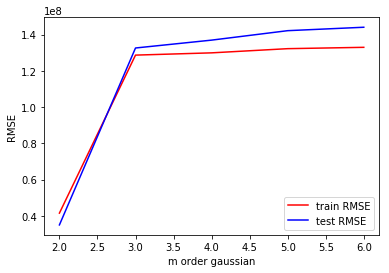

In [161]:
plt.plot(x_coord, y_coord_train_rmse, color='r', label = 'train RMSE')
plt.plot(x_coord, y_coord_test_rmse, color='b', label = 'test RMSE')
plt.legend(loc='best')
plt.xlabel('m order gaussian')
plt.ylabel('RMSE')
plt.show()

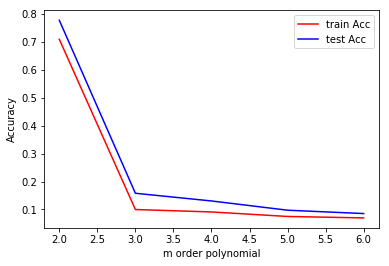

In [162]:
plt.plot(x_coord, y_coord_train_acc, color='r', label = 'train Acc')
plt.plot(x_coord, y_coord_test_acc, color='b', label = 'test Acc')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('Accuracy')
plt.show()

# Bayesian Linear Regression